In [1]:
from scipy.integrate import *
import pandas as pd
from numpy import *
from pylab import *
from scipy import *
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon


#import data from Lake Erie from bouys between 2012 to 2018
#HABs occur in Western Basin
df = pd.read_csv('lake_erie_habs_field_sampling_results_2012_2018.csv', encoding = 'latin1')

#change date to year first for sorting purposes
df['Date'] = pd.to_datetime(df['Date'])

# Drop all unneeded columns and drop rows where relevant columns are missing information (NaN)
relevant_df = df.copy()
relevant_df.drop(columns=["Sample Depth (category)", "Local Time (Eastern Time Zone)", "Wind speed (knots)", "Wave Height (ft)", "Sky", "Sample Temperature (deg C)", "CTD Temperature (deg C)", "CTD Specific Conductivity (muS/cm)", "CTD Beam Attenuation (m-1)", "CTD Tramission (%)", "CTD Dissolved Oxygen (mg/L)", "CTD Photosynthetically Active Radiation (muE/m2/s)", "Turbidity (NTU)", "Particulate Microcystin (mug/L)", "Dissolved Microcystin (mug/L)", "Total Dissolved Phosphorus (mug P/L)", "Soluble Reactive Phosphorus (mug P/L)", "Urea (mug N/L)", "Particulate Organic Carbon (mg/L)", "Particulate Organic Nitrogen (mg/L)", "Dissolved Organic Carbon (mg/L)", "Total Suspended Solids (mg/L)", "Volatile Suspended Solids (mg/L)"], inplace=True)

relevant_df.drop(relevant_df.columns[-1], axis=1, inplace=True)
relevant_df.dropna(axis=0, inplace=True)
relevant_df.head()

# Add year and day of year columns
relevant_df['Year'] = pd.DatetimeIndex(relevant_df['Date']).year
relevant_df['DayofYear'] = pd.DatetimeIndex(relevant_df['Date']).dayofyear

#sort data by site and date
site_date_sorted = relevant_df.sort_values(by =['Site', 'Date'])

site_date_sorted['Extracted Phycocyanin (mug/L)'] = site_date_sorted['Extracted Phycocyanin (mug/L)'].str.replace(r'<', '')
site_date_sorted['Extracted Phycocyanin (mug/L)'] = pd.to_numeric(site_date_sorted['Extracted Phycocyanin (mug/L)'])

site_date_sorted['Nitrate + Nitrite (mg N/L)'] = site_date_sorted['Nitrate + Nitrite (mg N/L)'].str.replace(r'<', '')

site_date_sorted = site_date_sorted.astype({'Nitrate + Nitrite (mg N/L)': 'float64'})

site_date_sorted['Ammonia (mug N/L)'] = site_date_sorted['Ammonia (mug N/L)'].str.replace(r'<', '')
site_date_sorted = site_date_sorted.astype({'Ammonia (mug N/L)': 'float64'})

# Sorting the data by uniques site and making a list of the unique sites
site_df = []
for i in range(len(site_date_sorted.Site.unique())):
    site_df.append(site_date_sorted.loc[site_date_sorted['Site'] == df.Site.unique()[i]])
    
#print(site_df)

# for each site, get data of just that year
site_year_df = []
for i in range(len(site_date_sorted.Site.unique())):
    year_df = []
    for j in range(len(site_date_sorted.Year.unique())):
        year_df.append(site_date_sorted.loc[(site_date_sorted['Site'] == site_date_sorted.Site.unique()[i]) & (site_date_sorted['Year'] == site_date_sorted.Year.unique()[j])])
    site_year_df.append(year_df)
    
# Making a column in the data frame labeled depth because station depth is the depth of the buoy and
# the sample depth is how deep into the water column the sample collector on the buoy went. 
#Adding them together will allow for us to use an equation to determine the irradiance available for that sample.
site_date_sorted['Depth'] = site_date_sorted["Station Depth (m)"] + site_date_sorted["Sample Depth (m)"]

site_date_sorted['Month'] = df['Date'].dt.strftime('%m')
site_date_sorted = site_date_sorted.sort_values(by = 'Month')
site_date_sorted_month = site_date_sorted.Month.unique()
#print(site_date_sorted_month)

df_2012 = site_date_sorted[site_date_sorted['Year']==2012]
df_2013 = site_date_sorted[site_date_sorted['Year']==2013]
df_2014 = site_date_sorted[site_date_sorted['Year']==2014]
df_2015 = site_date_sorted[site_date_sorted['Year']==2015]
df_2016 = site_date_sorted[site_date_sorted['Year']==2016]
df_2017 = site_date_sorted[site_date_sorted['Year']==2017]
df_2018 = site_date_sorted[site_date_sorted['Year']==2018]

df_2012['Month'] = df_2012['Date'].dt.strftime('%m')
df_2013['Month'] = df_2013['Date'].dt.strftime('%m')
df_2014['Month'] = df_2014['Date'].dt.strftime('%m')
df_2015['Month'] = df_2015['Date'].dt.strftime('%m')
df_2016['Month'] = df_2016['Date'].dt.strftime('%m')
df_2017['Month'] = df_2017['Date'].dt.strftime('%m')
df_2018['Month'] = df_2018['Date'].dt.strftime('%m')

df_2012.astype({'Secchi Depth (m)': 'float64'}).dtypes
df_2013.astype({'Secchi Depth (m)': 'float64'}).dtypes
df_2014.astype({'Secchi Depth (m)': 'float64'}).dtypes
df_2015.astype({'Secchi Depth (m)': 'float64'}).dtypes
df_2016.astype({'Secchi Depth (m)': 'float64'}).dtypes
df_2017.astype({'Secchi Depth (m)': 'float64'}).dtypes
df_2018.astype({'Secchi Depth (m)': 'float64'}).dtypes



<ipython-input-1-260b51dfc60d>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2012['Month'] = df_2012['Date'].dt.strftime('%m')
<ipython-input-1-260b51dfc60d>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2013['Month'] = df_2013['Date'].dt.strftime('%m')
<ipython-input-1-260b51dfc60d>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Date                               datetime64[ns]
Site                                       object
Station Depth (m)                         float64
Sample Depth (m)                          float64
Latitude (decimal deg)                    float64
Longitude (decimal deg)                   float64
Secchi Depth (m)                          float64
Extracted Phycocyanin (mug/L)             float64
Extracted Chlorophyll a (mug/L)           float64
Total Phosphorus (mug P/L)                float64
Ammonia (mug N/L)                         float64
Nitrate + Nitrite (mg N/L)                float64
Year                                        int64
DayofYear                                   int64
Depth                                     float64
Month                                      object
dtype: object

In [2]:
df_2012_month = []
for i in df_2012.Month.unique():
    df_2012_month.append(i)

df_2013_month = []
for i in df_2013.Month.unique():
    df_2013_month.append(i)
    
df_2014_month = []
for i in df_2014.Month.unique():
    df_2014_month.append(i)
    
df_2015_month = []
for i in df_2015.Month.unique():
    df_2015_month.append(i)
    
df_2016_month = []
for i in df_2016.Month.unique():
    df_2016_month.append(i)
    
df_2017_month = []
for i in df_2017.Month.unique():
    df_2017_month.append(i)
    
df_2018_month = []
for i in df_2018.Month.unique():
    df_2018_month.append(i)
    
df_2017 = df_2017.sort_values(by = 'Date')
df_2017_secchi_med = []
df_2017_secchi_med.append(np.percentile(df_2017[df_2017['Month']== '03']['Secchi Depth (m)'],50))
df_2017_secchi_med.append(np.percentile(df_2017[df_2017['Month']== '04']['Secchi Depth (m)'],50))
df_2017_secchi_med.append(np.percentile(df_2017[df_2017['Month']== '05']['Secchi Depth (m)'],50))
df_2017_secchi_med.append(np.percentile(df_2017[df_2017['Month']== '06']['Secchi Depth (m)'],50))
df_2017_secchi_med.append(np.percentile(df_2017[df_2017['Month']== '07']['Secchi Depth (m)'],50))
df_2017_secchi_med.append(np.percentile(df_2017[df_2017['Month']== '08']['Secchi Depth (m)'],50))
df_2017_secchi_med.append(np.percentile(df_2017[df_2017['Month']== '09']['Secchi Depth (m)'],50))
df_2017_secchi_med.append(np.percentile(df_2017[df_2017['Month']== '10']['Secchi Depth (m)'],50))


df_2012 = df_2012.sort_values(by = 'Date')
df_2012_secchi_med = []
df_2012_secchi_med.append(np.percentile(df_2012[df_2012['Month']== '05']['Secchi Depth (m)'],50))
df_2012_secchi_med.append(np.percentile(df_2012[df_2012['Month']== '06']['Secchi Depth (m)'],50))
df_2012_secchi_med.append(np.percentile(df_2012[df_2012['Month']== '07']['Secchi Depth (m)'],50))
df_2012_secchi_med.append(np.percentile(df_2012[df_2012['Month']== '08']['Secchi Depth (m)'],50))
df_2012_secchi_med.append(np.percentile(df_2012[df_2012['Month']== '09']['Secchi Depth (m)'],50))

df_2013 = df_2013.sort_values(by = 'Date')
df_2013_secchi_med = []
df_2013_secchi_med.append(np.percentile(df_2013[df_2013['Month']== '05']['Secchi Depth (m)'],50))
df_2013_secchi_med.append(np.percentile(df_2013[df_2013['Month']== '06']['Secchi Depth (m)'],50))
df_2013_secchi_med.append(np.percentile(df_2013[df_2013['Month']== '07']['Secchi Depth (m)'],50))
df_2013_secchi_med.append(np.percentile(df_2013[df_2013['Month']== '08']['Secchi Depth (m)'],50))
df_2013_secchi_med.append(np.percentile(df_2013[df_2013['Month']== '09']['Secchi Depth (m)'],50))
df_2013_secchi_med.append(np.percentile(df_2013[df_2013['Month']== '10']['Secchi Depth (m)'],50))

df_2014 = df_2014.sort_values(by = 'Date')
df_2014_secchi_med = []
df_2014_secchi_med.append(np.percentile(df_2014[df_2014['Month']== '05']['Secchi Depth (m)'],50))
df_2014_secchi_med.append(np.percentile(df_2014[df_2014['Month']== '06']['Secchi Depth (m)'],50))
df_2014_secchi_med.append(np.percentile(df_2014[df_2014['Month']== '07']['Secchi Depth (m)'],50))
df_2014_secchi_med.append(np.percentile(df_2014[df_2014['Month']== '08']['Secchi Depth (m)'],50))
df_2014_secchi_med.append(np.percentile(df_2014[df_2014['Month']== '09']['Secchi Depth (m)'],50))
df_2014_secchi_med.append(np.percentile(df_2014[df_2014['Month']== '10']['Secchi Depth (m)'],50))
df_2014_secchi_med.append(np.percentile(df_2014[df_2014['Month']== '11']['Secchi Depth (m)'],50))

df_2015 = df_2015.sort_values(by = 'Date')
df_2015_secchi_med = []
df_2015_secchi_med.append(np.percentile(df_2015[df_2015['Month']== '06']['Secchi Depth (m)'],50))
df_2015_secchi_med.append(np.percentile(df_2015[df_2015['Month']== '07']['Secchi Depth (m)'],50))
df_2015_secchi_med.append(np.percentile(df_2015[df_2015['Month']== '08']['Secchi Depth (m)'],50))
df_2015_secchi_med.append(np.percentile(df_2015[df_2015['Month']== '09']['Secchi Depth (m)'],50))
df_2015_secchi_med.append(np.percentile(df_2015[df_2015['Month']== '10']['Secchi Depth (m)'],50))

df_2016 = df_2016.sort_values(by = 'Date')
df_2016_secchi_med = []
df_2016_secchi_med.append(np.percentile(df_2016[df_2016['Month']== '05']['Secchi Depth (m)'],50))
df_2016_secchi_med.append(np.percentile(df_2016[df_2016['Month']== '06']['Secchi Depth (m)'],50))
df_2016_secchi_med.append(np.percentile(df_2016[df_2016['Month']== '07']['Secchi Depth (m)'],50))
df_2016_secchi_med.append(np.percentile(df_2016[df_2016['Month']== '08']['Secchi Depth (m)'],50))
df_2016_secchi_med.append(np.percentile(df_2016[df_2016['Month']== '09']['Secchi Depth (m)'],50))
df_2016_secchi_med.append(np.percentile(df_2016[df_2016['Month']== '10']['Secchi Depth (m)'],50))

df_2018 = df_2018.sort_values(by = 'Date')
df_2018_secchi_med = []
df_2018_secchi_med.append(np.percentile(df_2018[df_2018['Month']== '05']['Secchi Depth (m)'],50))
df_2018_secchi_med.append(np.percentile(df_2018[df_2018['Month']== '06']['Secchi Depth (m)'],50))
df_2018_secchi_med.append(np.percentile(df_2018[df_2018['Month']== '07']['Secchi Depth (m)'],50))
df_2018_secchi_med.append(np.percentile(df_2018[df_2018['Month']== '08']['Secchi Depth (m)'],50))
df_2018_secchi_med.append(np.percentile(df_2018[df_2018['Month']== '09']['Secchi Depth (m)'],50))
df_2018_secchi_med.append(np.percentile(df_2018[df_2018['Month']== '10']['Secchi Depth (m)'],50))



TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
df_2017[df_2017['Month']== '03']['Secchi Depth (m)']

In [ ]:
df_2017.astype({'Secchi Depth (m)': 'float64'}).dtypes

In [ ]:
np.percentile(df_2017[df_2017['Month']== '03']['Secchi Depth (m)'],50)

In [ ]:
#subplot
fig, axs = plt.subplots(1,2,figsize=(30,6))


# Plotting the different depths to know range of different depths and the frequency of them.
site_date_sorted.hist(column=['Depth'], bins=200)
axs[0].ylabel('# of samples')
axs[0].xlabel('depth (m)')
axs[0].ylim([0,18])
axs[0].yticks(np.arange(0, 18, 2))
plt.savefig("depths", bbox_inches='tight', dpi=300)

#plot secchi depth
axs[1].plot(df_2017_month,df_2017_secchi_med,'gray')
axs[1].plot(df_2012_month,df_2012_secchi_med,'black')
axs[1].plot(df_2013_month,df_2013_secchi_med,'blue')
axs[1].plot(df_2014_month,df_2014_secchi_med,'red')
axs[1].plot(df_2015_month,df_2015_secchi_med,'green')
axs[1].plot(df_2016_month,df_2016_secchi_med,'orange')
axs[1].plot(df_2017_month,df_2018_secchi_med,'gray')
axs[1].plot(site_date_sorted_month,np.log(site_date_sorted_tot_phos_med),'b--',linewidth = 3)
axs[1].set_title('Median Values',fontsize='xx-large')
axs[1].set_ylabel('Secchi Depth (m)',fontsize='xx-large')
axs[1].set_xlabel('Month',fontsize='xx-large')
axs[1].legend(('2017', '2012', '2013', '2014', '2015', '2016'), loc='best')
axs[1].set_ylim([-4,9])


plt.show()

In [ ]:
site_date_sorted.head()

In [ ]:
site_date_sorted.Year.unique()

In [3]:
a = np.average(site_date_sorted[site_date_sorted['Year']==2012]['Secchi Depth (m)'])
b = np.average(site_date_sorted[site_date_sorted['Year']==2013]['Secchi Depth (m)'])
c = np.average(site_date_sorted[site_date_sorted['Year']==2014]['Secchi Depth (m)'])
d = np.average(site_date_sorted[site_date_sorted['Year']==2015]['Secchi Depth (m)'])
e = np.average(site_date_sorted[site_date_sorted['Year']==2016]['Secchi Depth (m)'])
f = np.average(site_date_sorted[site_date_sorted['Year']==2017]['Secchi Depth (m)'])
g = np.average(site_date_sorted[site_date_sorted['Year']==2018]['Secchi Depth (m)'])

secchi_depth_average = [a,b,c,d,e,f,g]

aa = site_date_sorted[site_date_sorted['Year']==2012]['Secchi Depth (m)'].median()
bb = site_date_sorted[site_date_sorted['Year']==2013]['Secchi Depth (m)'].median()
cc = site_date_sorted[site_date_sorted['Year']==2014]['Secchi Depth (m)'].median()
dd = site_date_sorted[site_date_sorted['Year']==2015]['Secchi Depth (m)'].median()
ee = site_date_sorted[site_date_sorted['Year']==2016]['Secchi Depth (m)'].median()
ff = site_date_sorted[site_date_sorted['Year']==2017]['Secchi Depth (m)'].median()
gg = site_date_sorted[site_date_sorted['Year']==2018]['Secchi Depth (m)'].median()

secchi_depth_median = [aa,bb,cc,dd,ee,ff,gg]

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [4]:
site_date_sorted['Year'] = pd.to_numeric(site_date_sorted['Year'])

year = []
for i in site_date_sorted.Year.unique():
    year.append(i)
print(year)

[2017, 2012, 2016, 2018, 2013, 2014, 2015]


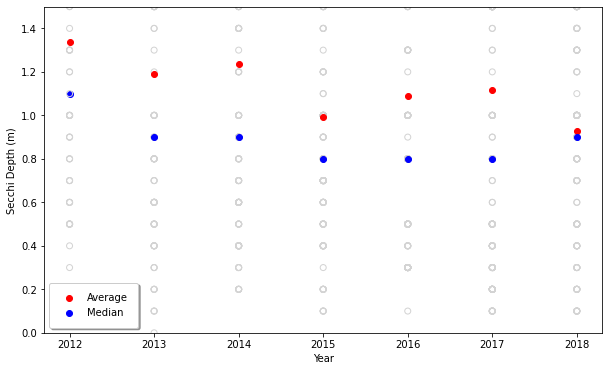

In [5]:
#site_date_sorted.astype({'Secchi Depth (m)': 'float64'}).dtypes
site_date_sorted['Secchi Depth (m)'] = pd.to_numeric(site_date_sorted['Secchi Depth (m)'])

plt.figure(figsize=(10,6))

plt.scatter(year[1],np.average(site_date_sorted[site_date_sorted['Year']==2012]['Secchi Depth (m)']),color='red')
plt.scatter(year[1],site_date_sorted[site_date_sorted['Year']==2012]['Secchi Depth (m)'].median(),color='blue')



plt.scatter(site_date_sorted['Year'],site_date_sorted['Secchi Depth (m)'],facecolors='none', edgecolors='lightgrey')

plt.scatter(year[4],np.average(site_date_sorted[site_date_sorted['Year']==2013]['Secchi Depth (m)']),color='red')
plt.scatter(year[5],np.average(site_date_sorted[site_date_sorted['Year']==2014]['Secchi Depth (m)']),color='red')
plt.scatter(year[6],np.average(site_date_sorted[site_date_sorted['Year']==2015]['Secchi Depth (m)']),color='red')
plt.scatter(year[2],np.average(site_date_sorted[site_date_sorted['Year']==2016]['Secchi Depth (m)']),color='red')
plt.scatter(year[0],np.average(site_date_sorted[site_date_sorted['Year']==2017]['Secchi Depth (m)']),color='red')
plt.scatter(year[3],np.average(site_date_sorted[site_date_sorted['Year']==2018]['Secchi Depth (m)']),color='red')


plt.scatter(year[4],site_date_sorted[site_date_sorted['Year']==2013]['Secchi Depth (m)'].median(),color='blue')
plt.scatter(year[5],site_date_sorted[site_date_sorted['Year']==2014]['Secchi Depth (m)'].median(),color='blue')
plt.scatter(year[6],site_date_sorted[site_date_sorted['Year']==2015]['Secchi Depth (m)'].median(),color='blue')
plt.scatter(year[2],site_date_sorted[site_date_sorted['Year']==2016]['Secchi Depth (m)'].median(),color='blue')
plt.scatter(year[0],site_date_sorted[site_date_sorted['Year']==2017]['Secchi Depth (m)'].median(),color='blue')
plt.scatter(year[3],site_date_sorted[site_date_sorted['Year']==2018]['Secchi Depth (m)'].median(),color='blue')

plt.ylim(0,1.5)
plt.ylabel('Secchi Depth (m)')
plt.xlabel('Year')

plt.legend(['Average','Median'], fancybox=True, framealpha=1, shadow=True, borderpad=1)


#year.sort()

#averages = pd.DataFrame({'Year' : year, 'Average' : secchi_depth_average, 'Median': secchi_depth_median})

#averages.head(8)
#averages.style.hide_index()

plt.savefig("secchi_depth_interannual", bbox_inches='tight', dpi=400)


plt.show()


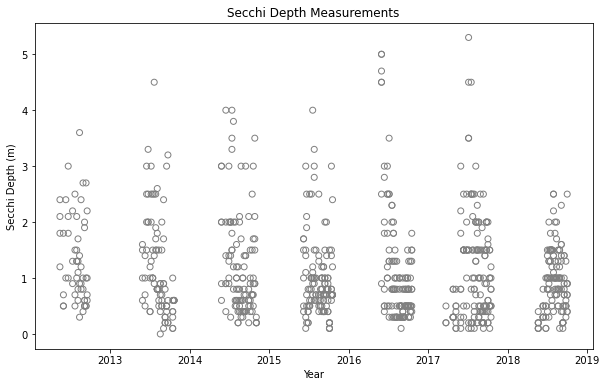

In [11]:
site_date_sorted['Secchi Depth (m)'] = pd.to_numeric(site_date_sorted['Secchi Depth (m)'])

plt.figure(figsize=(10,6))

plt.scatter(site_date_sorted['Date'],site_date_sorted['Secchi Depth (m)'],facecolors='none', edgecolors='grey')

plt.ylabel('Secchi Depth (m)')
plt.xlabel('Year')
plt.title('Secchi Depth Measurements')

plt.savefig("secchi_depth_scatter_intra", bbox_inches='tight', dpi=400)

plt.show()

In [7]:
import seaborn as sns

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


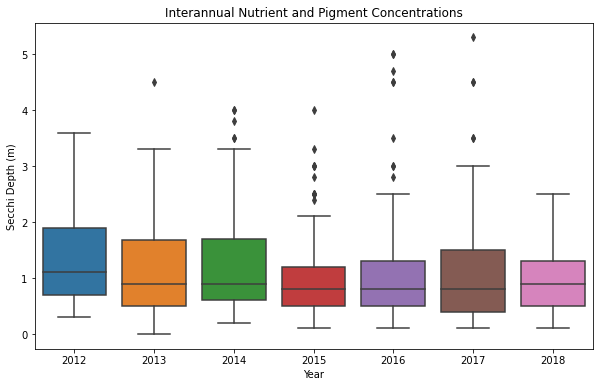

In [8]:
site_date_sorted['Secchi Depth (m)'] = pd.to_numeric(site_date_sorted['Secchi Depth (m)'])

plt.figure(figsize=(10,6))
sns.boxplot(site_date_sorted['Year'],site_date_sorted['Secchi Depth (m)'])

plt.title('Interannual Nutrient and Pigment Concentrations')

plt.savefig("secchi_depth_boxplot", bbox_inches='tight', dpi=400)

plt.show()


/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


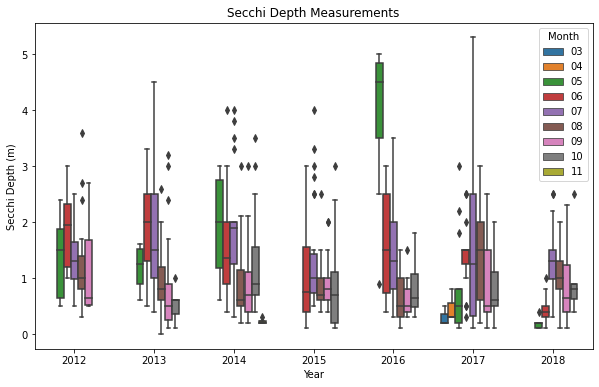

In [9]:
site_date_sorted['Secchi Depth (m)'] = pd.to_numeric(site_date_sorted['Secchi Depth (m)'])

plt.figure(figsize=(10,6))
sns.boxplot(site_date_sorted['Year'],site_date_sorted['Secchi Depth (m)'], hue = site_date_sorted['Month'])

plt.title('Secchi Depth Measurements')

plt.savefig("secchi_depth_boxplot_intra", bbox_inches='tight', dpi=400)

plt.show()

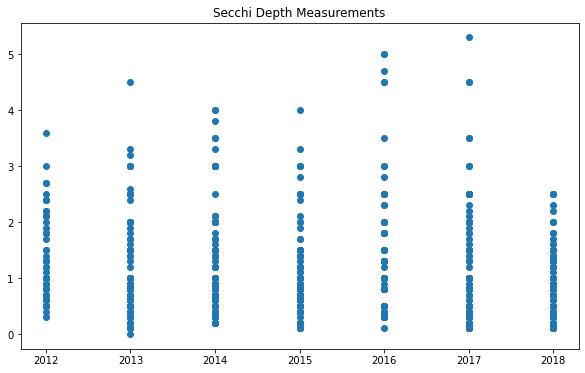

In [10]:
site_date_sorted['Secchi Depth (m)'] = pd.to_numeric(site_date_sorted['Secchi Depth (m)'])

plt.figure(figsize=(10,6))
plt.scatter(site_date_sorted['Year'],site_date_sorted['Secchi Depth (m)'])

plt.title('Secchi Depth Measurements')

plt.savefig("secchi_depth_scatter_intra", bbox_inches='tight', dpi=400)

plt.show()